In [1]:
import pandas as pd

In [2]:
iris = pd.read_excel(r'./data/Iris.xls')

iris

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = iris[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
y = iris['iris']

In [4]:
from modules.random_forest import CRandomForest

In [5]:
model = CRandomForest(X, y)
model.prepareData(0.7)

In [6]:
model.initModel()

In [7]:
model.accuracy()

0.9777777777777777

In [8]:
import numpy as np

In [9]:
X_new = np.array([
    [4.7, 3.2, 1.3, 0.2],
    [6.6, 3., 4.4, 1.4],
    [5.9, 3., 5.1, 1.8]
])

yhat_new = model.predict(X_new)

yhat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Chọn thuộc tính vs Random Forest

In [13]:
imp_features = pd.Series(model.model.feature_importances_, index=X.columns).sort_values(ascending=False)

imp_features

petalwidth     0.458509
petallength    0.421258
sepallength    0.092121
sepalwidth     0.028112
dtype: float64

In [14]:
import matplotlib.pyplot as plt

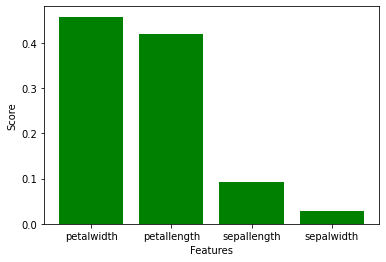

In [15]:
plt.bar(imp_features.index, imp_features, color='g')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Tính chiều cao trung bình của cây

In [17]:
max_depth = list()

for tree in model.model.estimators_:
    max_depth.append(tree.tree_.max_depth)

sum(max_depth)/len(max_depth)

4.64